# Mathematical solution

In [65]:
X = 13000
x1 = 8000
x2 = 5000
sigma1 = 0.5
sigma2 = 0.7
A = {"Goods are manufactured with excellent quality in the first plant"}
A = 0.85
B = {"Goods are manufactured with excellent quality in the second plant"}
B = 0.8
C = {"Seelected goods are manufactured with excellent quality"}

In [66]:
# by total probability theorem P(A) = P(B) P(A|B) + P(B′) P(A|B′)
a = x1 / X    # 8000 out of 13000 goods
b = x2 / X    # 5000 iut of 13000 goods
C = A * a + B * b
C

0.8307692307692308

In [67]:
# by Bayes' theorem P(A|B) = (P(B|A) * P(A)) / P(B)
D = a * A / C
print(f"Selected goods are manufactured in the first plant with a {D} chance.")

Selected goods are manufactured in the first plant with a 0.6296296296296297 chance.


In [68]:
# by Bayes' theorem P(A|B) = (P(B|A) * P(A)) / P(B)
E = b * B / C
print(f"Selected goods are manufactured in the second plant with a {E} chance.")

Selected goods are manufactured in the second plant with a 0.37037037037037035 chance.


In [69]:
# Checking if sum of both probabilities equal to 1
F = D + E
F

1.0

# Code solution

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import random
from sklearn.mixture import GaussianMixture

In [71]:
y1 = 13
y2 = 12

In [72]:
X1 = np.random.normal(loc=y1, scale=sigma1, size=8000)
X2 = np.random.normal(loc=y2, scale=sigma2, size=5000)
x = np.concatenate((X1, X2))
x

array([12.31027502, 12.3886353 , 12.86584885, ..., 11.66199332,
       12.48727103, 12.86281856])

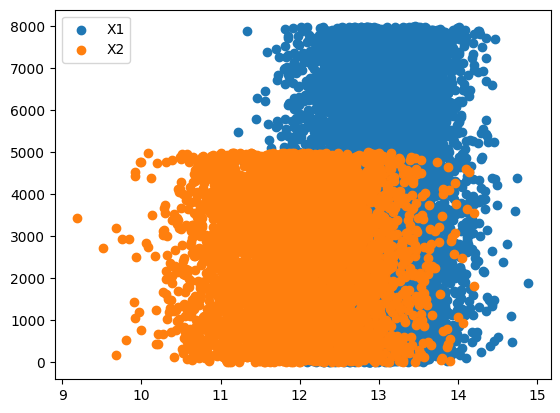

In [73]:
plt.scatter(X1, range(len(X1)), label="X1")
plt.scatter(X2, range(len(X2)), label="X2")
plt.legend()
plt.show()

In [74]:
gm = GaussianMixture(n_components=2).fit(x.reshape(-1, 1))
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [75]:
centers = gm.means_
print(centers)

[[11.9023829 ]
 [12.99824646]]


In [76]:
pred = gm.predict(x.reshape(-1, 1))
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [77]:
a1 = x[pred == 1]
b1 = x[pred == 0]
D1 = len(a1)/X
E1 = len(b1)/X
D1

0.6953076923076923

In [78]:
E1

0.3046923076923077

In [79]:
D1 + E1

1.0

# Conclusion

In [80]:
result = pd.DataFrame()
result["Lesson_51"] = ["Mathematical_solution", "Code_solution"]
result["Chanes_goods_are_from_first_plant"] = [D, D1]
result["Chanes_goods_are_from_second_plant"] = [E, E1]
result["Centers"] = [centers.round(3), [y2, y1]]
result

,Lesson_51,Chanes_goods_are_from_first_plant,Chanes_goods_are_from_second_plant,Centers
0,Mathematical_solution,0.629630,0.370370,"[[11.902], [12.998]]"
1,Code_solution,0.695308,0.304692,"[12, 13]"


**The model sticked to the centers, but defined classes not so accurate. We checked it with mathematical solution.**